## Why carbon pricing and transfers?

The Nash equilibrium leads to excessive emissions because
each region ignores the climate damages it imposes on others.

The key policy question is:

Can I design a system of carbon prices and transfers
such that self-interested regions choose the socially optimal policy?

This section shows that the answer is yes.


## Core idea

I use two instruments:

1. A carbon price \\( \\tau_t \\) applied to emissions
2. A system of lump-sum transfers \\( T_{i,t} \\)

The carbon price internalizes the climate externality.
Transfers ensure equity and political feasibility.


## Regional welfare with carbon pricing

With a carbon price \\( \\tau_t \\), region \\( i \\) maximizes:

\\[
u_i(E_{i,t}, R_{i,t})
- \tau_t E_{i,t}
+ \tau_t R_{i,t}
+ T_{i,t}
\\]

Carbon removal is rewarded at the same price,
because it reduces atmospheric carbon.


## Symmetric pricing intuition

Emissions increase atmospheric carbon.
Removals decrease atmospheric carbon.

A correct Pigouvian system:
- taxes emissions,
- subsidizes removals,
- uses the same shadow price.

This guarantees efficiency.


## Bellman equation with pricing

Region \\( i \\) solves:

\\[
\begin{aligned}
V_i(C_t) = \max_{E_i,R_i} \Big\{
& u_i(E_{i,t}, R_{i,t})
- \tau_t E_{i,t}
+ \tau_t R_{i,t}
+ T_{i,t} \\\\
& + \beta \big[
(1 - h(C_t)) V_i(C_{t+1}) + h(C_t) V_i^{post}
\big]
\Big\}
\end{aligned}
\\]


## Optimal carbon price

The optimal carbon price equals the social marginal damage of carbon:

\\[
\tau_t = \beta (1 - h(C_t))
\frac{\partial V(C_{t+1})}{\partial C_{t+1}}
\\]

This is the shadow price of atmospheric carbon
from the planner’s problem.


## Interpretation

- The price rises with tipping risk
- The price reflects future welfare losses
- Regions respond optimally without coordination

This is a dynamic Pigouvian tax under uncertainty.


In [114]:
# Numerical derivative of planner value function
dVdC = np.gradient(V, C_grid)

carbon_price = beta * (1 - hazard(C_grid)) * dVdC


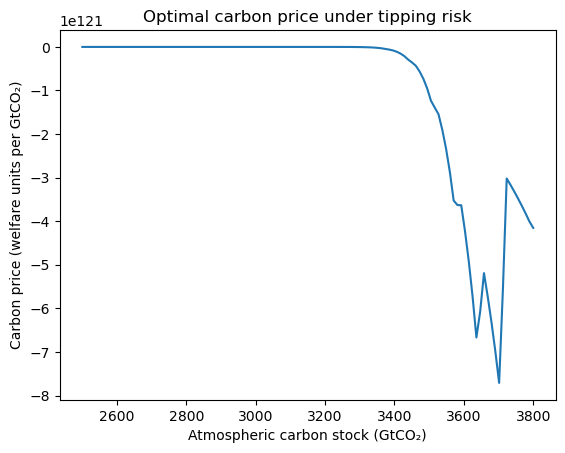

In [117]:
plt.figure()
plt.plot(C_grid, carbon_price)
plt.xlabel("Atmospheric carbon stock (GtCO₂)")
plt.ylabel("Carbon price (welfare units per GtCO₂)")
plt.title("Optimal carbon price under tipping risk")
plt.show()


## Transfers

Transfers do not affect efficiency.
They only affect distribution.

I impose:

\\[
\sum_i T_{i,t} = 0
\\]

This keeps the policy budget-neutral.


## Example transfer rule

I define transfers as:

\\[
T_{i,t} = \theta_i \tau_t (E_{i,t} - R_{i,t})
\\]

where:
- \\( \theta_i \\) controls redistribution,
- poorer regions receive positive transfers.


In [148]:
theta1, theta2 = -0.3, 0.3

transfer1 = theta1 * carbon_price * (policy_E1 - policy_R1)
transfer2 = theta2 * carbon_price * (policy_E2 - policy_R2)


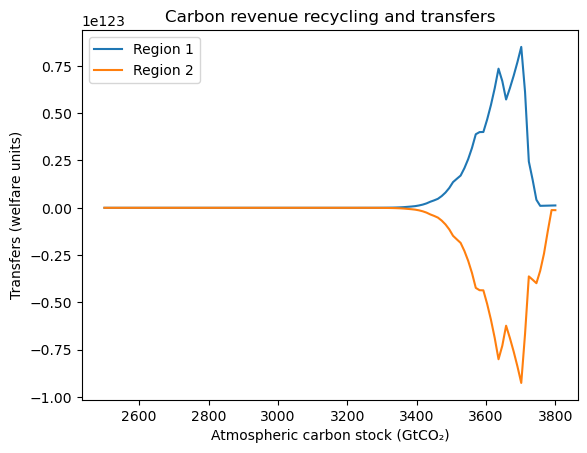

In [150]:
plt.figure()
plt.plot(C_grid, transfer1, label="Region 1")
plt.plot(C_grid, transfer2, label="Region 2")
plt.xlabel("Atmospheric carbon stock (GtCO₂)")
plt.ylabel("Transfers (welfare units)")
plt.title("Carbon revenue recycling and transfers")
plt.legend()
plt.show()


## Decentralization result

With:
- a carbon price equal to the shadow cost of carbon,
- appropriate lump-sum transfers,

the decentralized Nash equilibrium
replicates the social planner allocation.

This is a fundamental result in climate economics.


## Real-world interpretation

This framework corresponds to:
- global carbon pricing,
- carbon markets,
- international climate finance,
- loss-and-damage mechanisms.

It explains why pricing without transfers fails politically.


## Why this completes the project

I have shown:

- why markets fail (Nash equilibrium)
- how optimal policy looks (planner)
- how to implement it in practice (pricing + transfers).

This closes the theory–policy loop.
